# Problem and Data
1. Name: Jackson Meyer
2. Problem : I have a data file that contains Women's E-Commerce Clothing Reviews. I am doing a machine learning experiment to do a text analysis on the data so that I can predict with the highest accuracy and other metrics the the sentiment of the reviews and possible future ones. My dataset is here . https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
3. Data - Since I am doing text analysis, the only predictor column I am using is the 'Text Review' column which contains the actual review. My target column is the 'Recommended IND' binary column which contains the value 1 if the reviewer recommends the product to others and 0 if the reviewer does not recommend the product to others. I am also using the age, class name, and rating columns for non-text analysis related information. I have several plots that help to understand the relationship between the age of the customer, the rating, and the type of product.  
4. Data Preparation - To prepare my data, first I removed all columns that I would not be needing from my dataframe after I imported it using pandas. I then dealt with all NA values by filling them with "". Next I defined a function to clean my reviews. It used BeautifulSoup package to remove all non letter characters from the reviews and it also used stopwords to remove most of the words that would not have a correlation to the overall sentiment of the message. I then applied this function to all reviews in the dataframe. I used "Bag of Words" or rather the CountVectorizer package to transform my strings into words of row counts and made them arrays so they could be used with machine learning algorithms later. For some of my algorithms, I used PCA on my data for the feature extraction. This was all the data preparation I did. 
5. Metrics - For my metrics, I will be using a confusion matrix and classifcation report, which contains many useful metrics, but mainly the accuracy and precision score are what I am the most concerned with. These metrics make sense because we are dealing with a classification problem, so we want to have metrics that measure when we are right and wrong, not metrics that measure how close we were, such as r^2 or mean error squared. Those would be for regression problems. 
6. Baseline - For my baseline performance, I went for the glass half full approach and decided to assume everyone loves this Company's products and that all the reviews would be positive. If this were true, we would have an accuracy score of 82%. It also made more sense because there are a signifcantly more amount of positive reviews than negative ones. 
7. Models - I chose to use two models, a support vector machine and a naive bayes classifier. For the naive bayes classifier, I chose to use the multinomial model because the sklearn documentation recommened it for text classification problems. For SVM I am using the SVC model. While it is not a model itself, before training my SVC model, but not naive bayes, I will be doing PCA on my data. When tuning my two models, for SVC, I will change the kernel and other variables related to that such as coef0 and gamma and for my naive bayes MultinomialNB, I will be changing the fit_prior value as well as the alpha value. 

# Results and Interpretations  

1. Before doing any machine learning, I made 4 plots to find any possible relationships between other possible predictor columns that were not used in the experiment. These were age, product type/class name, and the more subjective rating on a scale of 1-5. I was able to see that the ratings were overall very high. The total amount for each number was in ascending order,i.e. the rating of 1 had the least amount and it went up to 5 having the most. 5 was much higher than 4 and 4 was also quite higher than 3,2, and 1. There was a pretty consistent level or number for the average rating across all class/product types. All feel between the high 3 to middle of 4 range. It was also a very consistent level for the average age of the reviewers for the product types, with the exception of one outlier. Casual bottoms had a significant lower average age than othre classes, which makes sense. The average age of the customers for each of the 5 rating numbers was the most consistent. All of the average ages for 1-5 fell between 42 and 44, meaning the majority of our customers who put in reviews are middle aged women.  

2. I was trying to find a way to display and show common words amongst positive and negative sentiment reviews, but I was struggling to come up with anything more than just printing out a list of words. I found out about a package called WordCloud when researching online that allows for super creative and visually appealling display of words. I used 2 cells out of this code and tutorial  https://www.kaggle.com/shirellamosi/sentiment-analysis-nlp#WordCloud---Repetition-of-words as a reference and source to the Word Cloud I used. I think the word cloud was super beneficial in giving a reassurance that the words in the reviews are somewhat correlated to the actually sentiment of the review. While the negative word cloud was not super awful, and contained some words that are not negative by default, I would able to tell by just looking that the positive word cloud was the positive reviews and the negative was the negative reviews. 

3. When looking at the results of the machine learning algorithms, there were clear ones that performed better than others. It is worth noting that our baseline for the experiment was actually super high, so I also had to set a high standard for the metrics of the models themselves. The base naive bayes classifier always seemed to out perform the others. It was consistently giving accuracy scores in the mid to low 90's and the confusion matrix was pretty balanced when it came to wrong predictions. There was not a noticeable difference between the false-positive predictions and the false negative predictions and the positive false predictions. The tuned naive bayes classifier did worse. It was falling in the mid 80's for accuracy, but I did not they had way more wrong guesses in the category of guessing negative sentiment, when it was really positive, so the model might be slighly better than what the accuracy score gives off. The PCA with SVM did not work very well at all. The base one actually created a model that predicted positive or yes for all examples, so it was really just the baseline model. When we tuned the SVM to being a sigmoid function with a gamma value of 'scale' it no longer predicted all positive sentiments, but the accuracy score was way lower than the baseline model, normally falling around the low 70's. Based on my experiment, I can say that only the base naive bayes model will consistently give better results than just being optimistic and predicting that all reviews will have a positive sentiment and a recommended value of yes.       



In [50]:
# import needed libraries. 
import pandas
import numpy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
# only run once 
#nltk.download()s
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import plotly.graph_objs as go
from plotly import subplots
import plotly.offline as py
from sklearn.decomposition import PCA
from wordcloud import WordCloud


In [51]:
# load in data and remove all columns we dont need
original_data = pandas.read_csv("clothing_reviews.csv")
data = original_data[['Review Text','Rating','Class Name','Age', 'Recommended IND']]
data['Review Text'] = data['Review Text'].fillna('')

# create a function that uses BeautifulSoup and stopwords
# to clean text reviews by removing irrelevant words and 
# keeping only letter characters
def cleanReview(review):
    rev_soup = BeautifulSoup(review)
    letters_only = re.sub("[^a-zA-Z]"," ",rev_soup.get_text())
    lower_case = letters_only.lower()
    words = lower_case.split()
    stop_words = set(stopwords.words("english"))
    sentence = []

    for w in words: 
        if w not in stop_words:
            sentence.append(w)

    clean_text = " ".join(sentence)
    return clean_text

text_reviews = data['Review Text']
cleaned_reviews = []

# clean all the reviews in the dataset
for review in text_reviews:
    cleaned_reviews.append(cleanReview(review))
    
data['Review Text'] = cleaned_reviews


C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
# create 4 plots the portray the relationship between age, rating, and
# class type. Not part of the experiment, but relevant information. 

total_ratings = data['Rating'].value_counts().to_frame()
average1 = data.groupby('Class Name').agg({'Rating':numpy.average})
average2 = data.groupby('Class Name').agg({'Age':numpy.average})
average3 = data.groupby('Rating').agg({'Age':numpy.average})

plot1 = go.Bar(x=total_ratings.index,y=total_ratings.Rating,marker_color=data['Rating'])
plot2 = go.Bar(x=average1.index,y=round(average1['Rating'],2),marker_color=data['Rating'])
plot3 = go.Bar(x=average2.index,y=round(average2['Age'],2),marker_color=data['Age'])
plot4 = go.Bar(x=average3.index,y=round(average3['Age'],2),marker_color=data['Age'])

subplots = subplots.make_subplots(rows=2, cols=2, print_grid=False)
subplots.append_trace(plot1, 1, 1)
subplots.append_trace(plot2, 1, 2)
subplots.append_trace(plot3, 2, 1)
subplots.append_trace(plot4, 2, 2)

subplots['layout']['xaxis1'].update(title='Rating')
subplots['layout']['yaxis1'].update(title='Total')
subplots['layout']['xaxis2'].update(title='Class/Type')
subplots['layout']['yaxis2'].update(title='Average Rating')
subplots['layout']['xaxis3'].update(title='Class/Type')
subplots['layout']['yaxis3'].update(title='Average Age')
subplots['layout']['xaxis4'].update(title='Rating')
subplots['layout']['yaxis4'].update(title='Average Age')

subplots['layout'].update(height=1000, width=1000,showlegend=False)
py.iplot(subplots)

In [53]:
# create training and testing sets
(train_reviews, test_reviews, train_target, test_target) = \
train_test_split(data['Review Text'], data["Recommended IND"],\
test_size = 0.2)

# use bag of words to turn the text's into rows of word 
# counts to be used with machine learning experiments
vectorizer = CountVectorizer(analyzer='word', \
max_features = 5000)
vectorizer.fit(train_reviews)

train_word_columns = vectorizer.transform(train_reviews).toarray()
test_word_columns = vectorizer.transform(test_reviews).toarray()


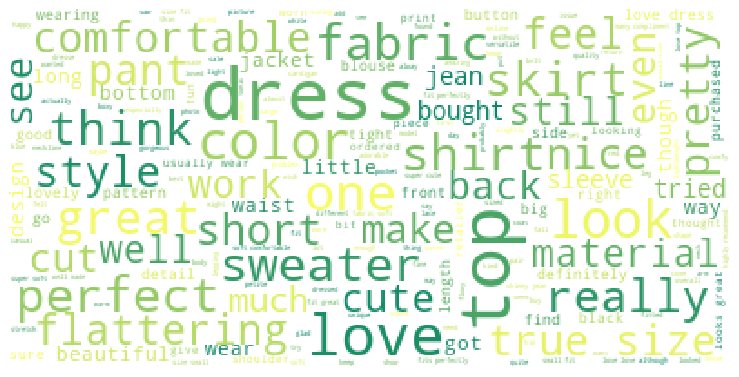

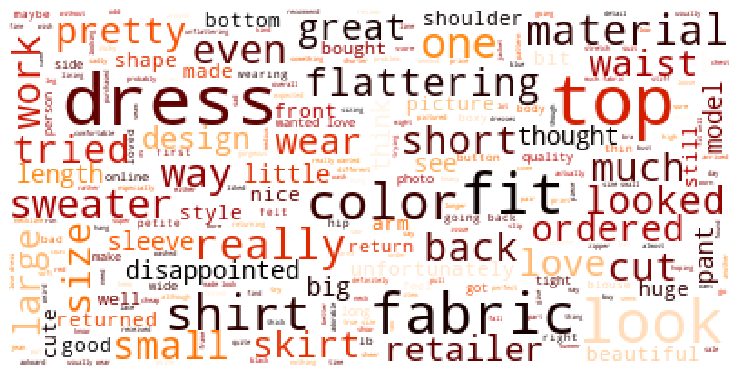

In [54]:
# this uses the word cloud package to create visually appealing
# images of common words amongst positive and negative sentiment 
# reviews. I reference my source for this idea in the markdown
# cell at the top. 

pos_df = data[data['Recommended IND']==1]
neg_df = data[data['Recommended IND']==0]

pos_words = []
neg_words = []

for review in pos_df['Review Text']:
    pos_words.append(review)
for review in neg_df['Review Text']:
    neg_words.append(review)
pos_words = ' '.join(pos_words)
pos_words[:50]
neg_words = ' '.join(neg_words)
neg_words[:500]


wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
# find base accuracy score
yes_no_vals = data['Recommended IND'].value_counts()
base_acc_score = (yes_no_vals[1]/(yes_no_vals[1] + yes_no_vals[0]))
print("Assuming all reviews are positive....\n",
        "Base Accuracy Score:", round(base_acc_score,2))

# create a base naive bayes model, train it and test it
mnb = MultinomialNB()
mnb.fit(train_word_columns,train_target)
preds = mnb.predict(test_word_columns)
nb_acc = accuracy_score(test_target, preds)
# display the metrics off the model
print("Naive Bayes Results")
print("Confusion Matrix : \n", confusion_matrix(y_true=test_target, y_pred=preds))
print("Classification Report : \n" + classification_report(y_true=test_target, y_pred=preds))

# do PCA on the data before using the next model
extractor = PCA(n_components=2)
extractor.fit(train_word_columns)
train_tran = extractor.transform(train_word_columns)
test_tran = extractor.transform(test_word_columns)

# create a base SVM model and train and test it with our 
# data we did PCA on
svm = SVC()
svm.fit(train_tran, train_target)
preds2 = svm.predict(test_tran)
svc_acc = accuracy_score(test_target, preds2)
# display the metrics off the model
print("SVC with PCA  Results")
print("Confusion Matrix : \n", confusion_matrix(y_true=test_target, y_pred=preds2))
print("Classification Report : \n" + classification_report(y_true=test_target, y_pred=preds2))


Assuming all reviews are positive....
 Base Accuracy Score: 0.82
Naive Bayes Results
Confusion Matrix : 
 [[ 644  209]
 [ 300 3545]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.75      0.72       853
           1       0.94      0.92      0.93      3845

    accuracy                           0.89      4698
   macro avg       0.81      0.84      0.82      4698
weighted avg       0.90      0.89      0.89      4698



C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC with PCA  Results
Confusion Matrix : 
 [[   0  853]
 [   0 3845]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       853
           1       0.82      1.00      0.90      3845

    accuracy                           0.82      4698
   macro avg       0.41      0.50      0.45      4698
weighted avg       0.67      0.82      0.74      4698



C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [56]:
# create a tuned naive bayes model to train and test
mnb2 = MultinomialNB(fit_prior=False)
mnb2.fit(train_word_columns,train_target)
preds3 = mnb2.predict(test_word_columns)
tuned_nb_acc = accuracy_score(test_target, preds3) 
# display the metrics off the model
print("Tuned Naive Bayes Results")
print("Confusion Matrix : \n", confusion_matrix(y_true=test_target, y_pred=preds3))
print("Classification Report : \n" + classification_report(y_true=test_target, y_pred=preds3))

# create a tuned SVM model to train and test.(Using the PCA data)
svm2 = SVC( gamma = 'scale', kernel = 'sigmoid')
svm2.fit(train_tran, train_target)
preds4 = svm2.predict(test_tran)
tuned_SVC_acc = accuracy_score(test_target, preds4)
# display the metrics off the model
print("Tuned SVC with PCA  Results")
print("Confusion Matrix : \n", confusion_matrix(y_true=test_target, y_pred=preds4))
print("Classification Report : \n" + classification_report(y_true=test_target, y_pred=preds4))



Tuned Naive Bayes Results
Confusion Matrix : 
 [[ 744  109]
 [ 640 3205]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.54      0.87      0.67       853
           1       0.97      0.83      0.90      3845

    accuracy                           0.84      4698
   macro avg       0.75      0.85      0.78      4698
weighted avg       0.89      0.84      0.85      4698

Tuned SVC with PCA  Results
Confusion Matrix : 
 [[ 132  721]
 [ 653 3192]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.17      0.15      0.16       853
           1       0.82      0.83      0.82      3845

    accuracy                           0.71      4698
   macro avg       0.49      0.49      0.49      4698
weighted avg       0.70      0.71      0.70      4698



Text(0.5, 1.0, 'E-Commerce Clothing Review Sentiment Analysis')

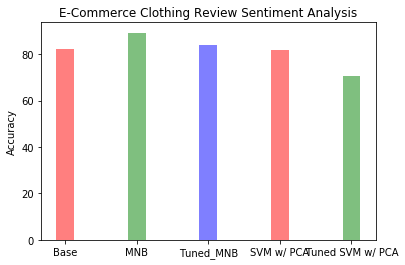

In [57]:
# Graph and compare the base accuracy score to those of the 4 machine 
# learning models we used in this experiment
x_vals = ('Base', 'MNB','Tuned_MNB', 'SVM w/ PCA', 'Tuned SVM w/ PCA')
y_pos = numpy.arange(len(x_vals))
percents = [100* base_acc_score, 100*nb_acc, 100*tuned_nb_acc,100* svc_acc, 100*tuned_SVC_acc ]
plt.bar(y_pos, percents, align='center', alpha=0.5, width=.25,color = 'rgb')
plt.xticks(y_pos, x_vals)
plt.ylabel('Accuracy')
plt.title('E-Commerce Clothing Review Sentiment Analysis')
